<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%B0%91%EB%B0%94%EB%8B%A52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# 1장: 신경망 복습

## 기초적 구현

* 직접 처보면서 코드 연습하기

In [ ]:
# 시그모이드랑 Affine 구현하고, 이층 신경망 구현하기 (역전파는 구현X)

class Sigmoid:
  def __init__(self):
    self.params = []

  def forward(self, x):
    return 1/ (1 + np.exp(-x))

class Affine:
  def __init__(self,W,b):
    self.params = [W,b]
  
  def forward(self,x):
    W,b = self.params
    out = np.matmul(x,W) + b
    return out 

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I,H,O = input_size, hidden_size, output_size

    W1 = np.random.randn(I,H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H,O)
    b2 = np.random.randn(O)

    self.layers = [Affine(W1,b1), Sigmoid(), Affine(W2,b2)]

    self.params = []
    for layer in self.layers:
      self.params += layer.params

    def predict(self,x):
      for layer in self.layers:
        x = layer.forward(x)
      
      return x 

In [ ]:
# 이제는 역전파까지 구현해보자

class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads =[ np.zeros_like(W)]
    self.X = None

    def forward(self,x):
      W, self.params
      out = np.matmul(x,W)
      self.x = x
      return out

    def backward(self,dout):
      W, = self.params
      dx = np.matmul(dout,W.T)
      dw = np.matmul(self.x.T, dout)
      self.grads[0][...] = dw
      return dx

class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None

  def forward(self, x):
    out =  1/ (1 + np.exp(-x))
    self. out = out
    return out

  def backward(self,dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

class Affine:
  def __init__(self,W,b):
    self.params = [W,b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None

  def forward(self,x):
    W,b = self.params
    out = np.matmul(x,W) + b
    self.x = None
    return out

  def backward(self, dout):
    W,b = self.params
    dx = np.matmul(dout,W.T)
    dW = np.matmul(self.x.T, dout)
    db = np.sum(dout, axis=0)

    self.grads[0][...] = dW
    self.grads[1][...] = db
    
    return dx

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for i in range(len(params)):
      params[i] -= self.lr * grads[i]

## 간단한 신경망 학습을 해보자

In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2/dataset')

import spiral

x,t = spiral.load_data()

print(x.shape)

(300, 2)


In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I,H,O = input_size, hidden_size, output_size

    W1 = 0.01 * np.random.randn(I,H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H,O)
    b2 = np.zeros(O)

    self.layers = [Affine(W1,b1), Sigmoid(), Affine(W2,b2)]
    self.loss_layer = SoftmaxWithLoss()

    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads
    
    def predict(self,x):
      for layer in self.layers:
        x = layer.forward(x)      

      return x 

    def forward(self,x,t):
      score = self.predict(x)
      loss = self.loss_layer.forward(score, t)
      return loss

    def backward(self, dout=1):
      dout = self.loss_layer.backward(dout)
      for layer in reversed(self.layers):
        dout = layer.backward(dout)
        return dout

In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')

from common.optimizer import SGD
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

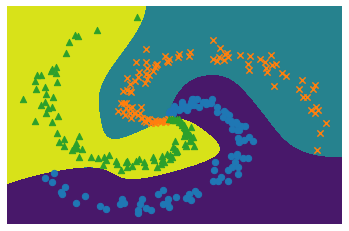

In [ ]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

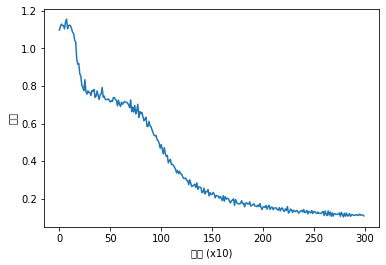

In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')

from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot();

# 2장: 자연어와 단어의 분산 표현

말뭉치를 표현하기 위한 처리를 구현해보자

In [ ]:
def preprocess(text):
  text = text.lower().replace('.' , ' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([ word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and I say hello. '
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
word_to_id

[0 1 2 3 4 1 5 6 7]


{'': 7, '.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

말뭉치에서 동시발생 행렬을 만드는 코드를 짜보자

In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i 
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix

In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')

from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello. '

corpus, word_to_id, id_to_world = preprocess(text)

vocab_size = len(word_to_id)

C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

cos_similarity(c0,c1)

0.7071067691154799

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


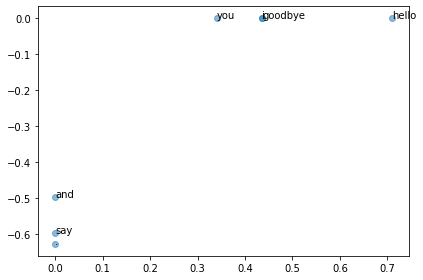

In [4]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')

from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

np.set_printoptions(precision=3)  
print(C[0])
print(W[0])
print(U[0])

# plot
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.tight_layout();

In [ ]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2')

from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')

# truncated SVD (빠르다!)
from sklearn.utils.extmath import randomized_svd
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

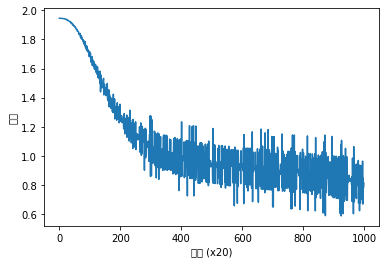

In [5]:
sys.path.append('/content/drive/MyDrive/독학/deep-learning-from-scratch-2') 

from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [8]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
  print(word, word_vecs[word_id])

you [ 1.2437423 -1.2354332  1.0882479  1.1772087  1.1603078]
say [-1.1856419  1.1820239 -1.2082871 -1.1364625 -1.1713829]
goodbye [ 0.6084034  -0.73150563  0.92793095  0.74300414  0.75076705]
and [-1.1942805  1.143467  -0.3542068 -1.5562025 -1.2204359]
i [ 0.60027254 -0.70028967  0.91102034  0.7124876   0.74064696]
hello [ 1.2316726 -1.2226499  1.0807961  1.1995127  1.1508174]
. [-0.72913945  0.75518984 -1.5537629   0.12743333 -0.6923315 ]
